# Hashfunktionen

**Prof. Dr. David Klotz** \
Hochschule der Medien Stuttgart \
Studiengang Wirtschaftsinformatik und digitale Medien (Bachelor) \
Grundlagen der Wirtschaftsinformatik

## Was sind Hashfunktionen?

Hashfunktionen sind mathematische Funktionen $h(x)$ mit einer Besonderheit: Sie liefern unabhängig vom übergebenen Wert $x$ immer einen Funktionswert $h(x)$ mit *fester Breite*. Man nennt den Funktionswert einer Hashfunktion häufig auch den *Hashwert* oder kurz nur den *Hash*.

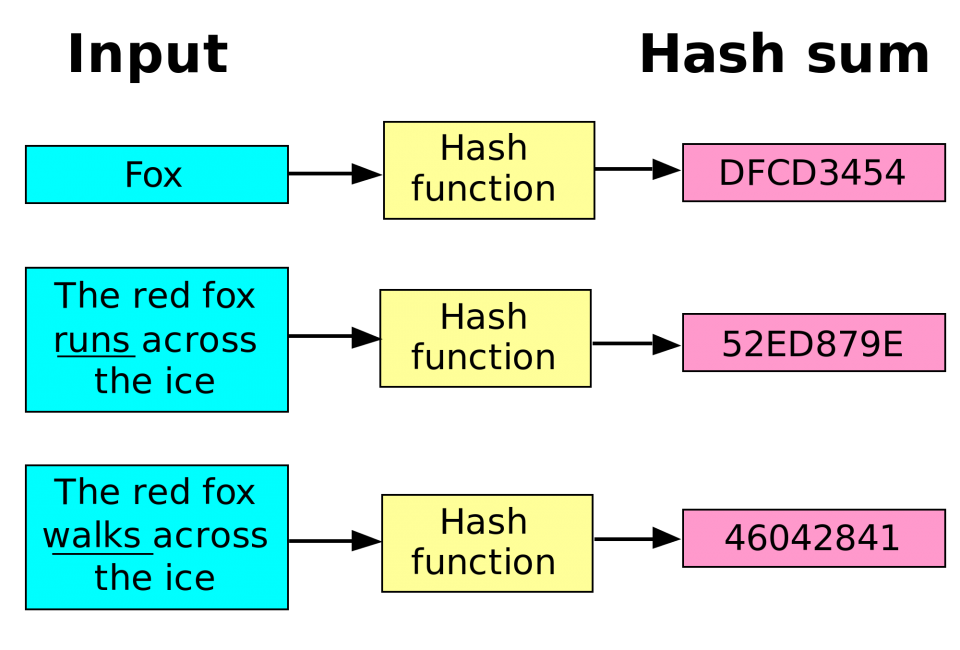

## Allgemeine Eigenschaften von Hashfunktionen

* Hashfunktionen sind *deterministisch*, d.h. sie liefern für ein bestimmtes $x$ immer den gleichen Funktionswert $h(x)$.
* Die Mächtigkeit der Urmenge ist größer oder gleich der Mächtigkeit der Bildmenge. Sind die beiden Mengen nicht gleich groß (Sonderfall), so gibt es zwangsläufig unterschiedliche Werte $x_1, x_2$ für die gilt $h(x_1)=h(x_2)$. Die Funktion ist also nicht injektiv. Man spricht in diesem Fall auch von einer *Kollision*.
* Kann eine Kollision ausgeschlossen werden, so spricht man auch von einer *perfekten* Hashfunktion.
* Hashfunktionen können *ordnungserhaltend* sein, d.h. für beliebige $x_1 < x_2$ gilt auch $h(x_1) < h(x_2)$. Nicht alle Hashfunktionen erfüllen diese Eigenschaft.
* Ein weiterer wichtiger Aspekt von Hashfunktionen ist der benötigte Rechenaufwand für die Berechnung des Funktionswerts $h(x)$. Je aufwändiger die Berechnung ist, desto sicherer ist die Hashfunktion gegen *brute force* Angriffe (zumindest in der Gegenwart).

## Beispiel

Wir können eine Funktion definieren, die ein Wort der deutschen Sprache als Eingabe erhält und zu diesem Wort den Anfangsbuchstaben zurückliefert.

Die Eingabe kann eine variable Länge haben, doch die Ausgabe ist immer gleich Breit - in diesem Fall exakt ein Zeichen.

Der Funktionswert von `Hallo` wäre `H`, der Funktionswert von `Elephant` wäre `E`, der von `Maus` wäre `M`, usw.

Eine solche Funktion wäre nützlich, wenn wir eine große Menge von Worten haben und diese so speichern möchten, dass wir gesuchte Objekte schneller wiederfinden (vgl. Wörterbuch).


## Hashfunktionen in der IT

In der Informationstechnik sind Hashfunktionen recht nützlich. Ähnlich einem Wörtbuch erlauben sie es uns zum Beispiel ganz allgemein, Speicherobjekte so im Hauptspeicher abzulegen, dass sie relativ schnell auffindbar sind.

Auch bei der Übertragung von Informationen sind Hashfunktionen hilfreich, denn wir können so z.B. Prüfsummen zu übermittelten Paketen auf der Sender- und Empfängerseite vergleichen um zu ermitteln, ob die Sendung vollständig und korrekt ist. 

## Kryptografische Hashfunktionen

Eine besonders wichtige Rolle kommt den *kryptografischen Hashfunktionen* zu. Sie sind besondere Hashfunktionen, da sie über weitere Eigenschaften verfügen:

1. **Konfusion bzw. Unumkehrbarkeit**: Vom Ergebnis soll man möglichst keine Rückschlüsse auf den Eingabewert ziehen können.
2. **Kollisionssicherheit**: Zwei unterschiedliche Eingabewerte sollen möglichst auch unterschiedliche Ergebnisse erzeugen. Anmerkung: Ideal wäre eine perfekte Hashfunktion, bei der Kollisionen ausgeschlossen sind, aber das ist in der Praxis nicht realisierbar. Wir nennen eine Hashfunktion kollisionssicher, wenn die Wahrscheinlichkeit für das Auftreten einer Kollision hinreichend gering ist.
3. **Lawineneffekt bzw. Diffusion**: Eine kleine Veränderung des Eingabewertes soll möglichst sehr große Veränderungen an der Ausgabe verursachen.

## Digitaler Fingerabdruck

Erfüllt eine Hashfunktion die drei genannten Eigenschaften der Unumkehrbarkeit, Kollisionssicherheit und des Lawineneffekts, dann kann man sie für Zwecke der Informationssicherheit verwenden.

Eine solche Hashfunktion kann nämlich zu jedem beliebigen Datenobjekte einen Hashwert berechnen und dieser ist - aufgrund der Kollisionssicherheit - praktisch einzigartig. Ein so erzeugter Hash kann also als der **digitale Fingerabdruck** eines Datenobjekts angesehen werden: Durch einen Vergleich des Hashes kann man schnell bestimmen, ob zwei Datenobjekte identisch sind.

Beispiel: Möchte man sicherstellen, dass eine Datei beim Download von einer Webseite nicht manipuliert wird (z.B. durch einen *man in the middle* Angriff), so kann man hierfür kryptografische Hashfunktionen nutzen:
* Der Anbieter der Datei errechnet den Hash mit einer kryptografischen Hashfunktion, z.B. SHA-256 und veröffentlicht diesen nebst der entsprechenden Datei.
* Ein Anwender kann die Datei herunterladen und sie prüfen, indem er ebenfalls den Hashwert mit der gleichen Hashfunktion berechnet.
* Sind beide Hashwerte identisch, wurde die Datei unversehrt übertragen. Weichen die Hashwerte voneinander ab, sind die Dateien nicht mehr identisch.

Der Kollisionssicherheit soll es einem Angreifer zudem praktisch unmöglich machen, eine kompromittierte Datei mit gleichem Hashwert zu erzeugen (die der Anwender dann nicht mehr vom Original unterscheiden könnte). Damit dies auch praktisch unmöglich ist, sind die Eigenschaften der Unumkehrbarkeit und des Lawineneffekts notwendig.

## Blockchains

Auch Blockchains machen sich kryptografische Hashfunktionen zu Nutze:

* Vereinfacht gesagt besteht eine Blockchain aus einer verketteten Liste von Datenblöcken.
* Diese Liste wird auf den Rechnern der Nutzer einer Blockchain gespeichert.
* Damit der Inhalt eines Blocks nicht manipuliert werden kann, speichert jeder nachfolgende Block den Hashwert des vorhergehenden ab.
* Wollte ein Angreifer nun den Inhalt eines abgeschlossenen Blocks verändern, würde dessen Hashwert nicht mehr zum nachfolgenden Block passen und die gesamte Kette damit als ungültig erkannt.

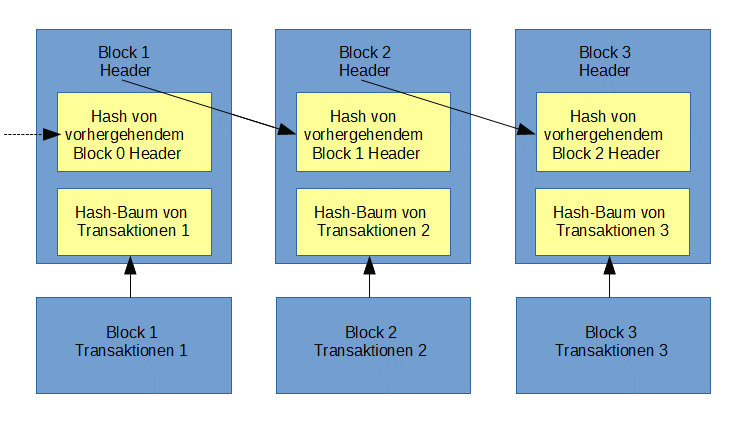

## Hashing bei Passwörtern

Viele Anwendungen nutzen eine Authentifizierung mit Benutzernamen und Passwort. Hierbei hat der Anbieter der Anwendung ein Problem: Speichert er das Passwort im Klartext ab, können seine Mitarbeiter (z.B. Programmierer oder Datenbankadministratoren) in den Besitz der Passwörter gelangen.

Die Lösung des Problems sind Hashfunktionen: Anstatt das Passwort selbst zu speichern, wird bei der erstmaligen Eingabe des Passworts mit Hilfe einer kryptografischen Hashfunktion (z.B. SHA-256) ein Hashwert errechnet und nur dieser gespeichert.

Bei erneuten Anmeldungen wird für das eingegebene Passwort erneut der Hashwert berechnet. Ist das Passwort identisch mit dem bei der erstmaligen Speicherung angegebenen Passwort, dann ist auch der Hashwert identisch mit dem gespeicherten.

Aufgrund der Unumkehrbarkeit von kryptografischen Hashfunktionen ist eine Kenntnis des Hashwertes allein nun nicht mehr sicherheitskritisch, denn ein Angreifer wüsste nicht, durch welche Eingabe man diesen Hashwert erzeugen kann.

## Hashings in Python
Es gibt in der Python Standard Library das Modul [`hashlib`](https://docs.python.org/3/library/hashlib.html), welches eine recht komfortable Schnittstelle für die meisten Aufgaben rund um das Thema Hashfunktionen anbietet. Das Modul stellt auch sichere Implementierungen der gängigsten Hash-Algorithmen bereit. Wir werden diese daher als erstes importieren, um sie in nachfolgenden Codezellen verwenden zu können. 

In [10]:
import hashlib

### Hash eines Textes mit SHA-256 erzeugen
Als erstes nutzen wir den Hashing-Algorithmus [SHA-2](https://de.wikipedia.org/wiki/SHA-2) um den Hash einer gegebenen Zeichenkette zu berechnen.

In [11]:
erster_text = 'His palms are sweaty, knees weak, arms are heavy.'
print('SHA-256:', hashlib.sha256(erster_text))

TypeError: Strings must be encoded before hashing

Das funktioniert so nicht 😞. Das Modul `hashlib` benötigt alle Eingabedaten in binärer Darstellung, da Algorithmen in der Regel auf Bitebene arbeiten. Da es mehrere Möglichkeiten gibt, eine Zeichenkette zu codieren (z.B. ASCII oder Unicode) kann `hashlib` uns die Entscheidung auch nicht abnehmen.

Glücklicherweise ist das jedoch schnell behoben: Wir können die eingebaute `encode()`-Methode von String-Objekten verwenden, um diese zu codieren. Wir können der Methode mitteilen, welche Codierung wir wünschen, aber wenn wir einfach gar keinen Parameter übergeben, wird die Codierung UTF-8 verwendet, welche für die meisten Anwendungsfälle ausreichend ist.

In [12]:
erster_text = 'His palms are sweaty, knees weak, arms are heavy.'.encode()
print(erster_text)

b'His palms are sweaty, knees weak, arms are heavy.'


Das sieht gut aus: Das `b` vor der Zeichenkette signalisiert uns, dass es sich nun um Binärdaten handelt. Wir können das noch zusätzlich überprüfen, indem wir den Datentyp von `erster_text` ausgeben:

In [13]:
print(type(erster_text))

<class 'bytes'>


Nun können wir die Zeichenkette an `hashlib.sha-256()` übergeben und bekommen als Ergebnis einen Hash zurück. Um diesen auszugeben, nutzen wir die Methode `hexdigest()`, welche den Hash recht kompakt im Hexadezimalsystem ausgibt:

In [14]:
print('SHA-256:', hashlib.sha256(erster_text).hexdigest())

SHA-256: 791e83bf3360f2465037a3f93751e583efb86b69a16cc4242f779c88572f2943


Et voilà - wir haben unseren ersten Hash-Wert erzeugt! 🙌

Sprechen wir ganz kurz über die Mathematik dahinter: SHA-256 erzeugt, wie der Name schon andeutet, immer Hash-Werte mit einer Länge von 256 Bits.

**Frage**: Wie viele Zeichen sind notwendig, um einen SHA-256 Hashwert im Hexadezimalsystem auszugeben?

(Denke kurz darüber nach, die Antwort ist relativ leicht berechenbar. Wenn du die Lösung hast oder zu ungeduldig bist, kannst du auch die nächste Zelle ausführen und es dir anzeigen lassen.)

In [15]:
print('Länge eines SHA-256 Hashes in hexadezimaler Darstellung:', len(hashlib.sha256(erster_text).hexdigest()))

Länge eines SHA-256 Hashes in hexadezimaler Darstellung: 64


Erklärung: Eine Ziffer des Hexadezimalsystems kann 16 verschiedene Werte speichern (da die Basis = 16 ist). Um 16 Werte im Binärsystem zu speichern, bräuchte man $log_216 = 4$ Stellen. Wenn also eine Stelle im Hexadezimalsystem vier Stellen im Binärsystem entspricht, dann baucht man $\frac{256}4=64$ Stellen, um eine Binärzahl mit 256 Stellen im Hexadezimalsystem darzustellen.

### Determinismus
Okay, genug Mathematik! Schauen wir uns die Eigenschaften des verwendeten Hashing-Algorithmus SHA-256 genauer an. Als erstes die Eigenschaft des **Determinismus**. Demnach erzeugen gleiche Eingabedaten immer das gleiche Ergebnis. Das probieren wir aus:

In [17]:
z1 = 'Hallo Welt!'.encode()
z2 = 'Hallo Welt!'.encode()

# z1 und z2 sind nicht identisch, d.h. wir haben zwei unterschiedliche Datenobjekte
if z1 is z2:
  print('Identisch')
else:
  print('Nicht identisch')

# Die Hashes sind jedoch identisch
print('SHA-256 von z1', hashlib.sha256(z1).hexdigest())
print('SHA-256 von z2', hashlib.sha256(z1).hexdigest())

Nicht identisch
SHA-256 von z1 a582e8c28249fe7d7990bfa0afebd2da9185a9f831d4215b4efec74f355b301a
SHA-256 von z2 a582e8c28249fe7d7990bfa0afebd2da9185a9f831d4215b4efec74f355b301a


Dieser Hash-Wert bleibt auch gleich, wenn wir die Zelle wiederholt ausführen -- probiere es ruhig aus! Der Hash-Algorithmus SHA-256 ist also tatsächlich deterministisch.

### Konfusion und Unumkehrbarkeit
Einen Hash wieder zurück in die ursprünglichen Eingabedaten zu verwandeln, ist bei gängigen Hashing-Algorithmen quasi unmöglich. Wie schon bei der Verschlüsselung nutzt man hier die Eigenschaften von *mathematischen Einwegfunktionen* aus. Zudem ist es kaum möglich, von einem Hash Rückschlüsse auf die Eingabedaten zu ziehen. Wir testen auch dies aus.

Zur Abwechslung verwenden wir nun jedoch mal einen anderen Hashing-Algorithmus verwenden. `hashlib` enthält einige Algorithmen und kann eine Liste dieser Algorithmen mit dem Property `algorithms_available` ausgeben:

In [18]:
hashlib.algorithms_available

{'blake2b',
 'blake2s',
 'md4',
 'md5',
 'md5-sha1',
 'mdc2',
 'ripemd160',
 'sha1',
 'sha224',
 'sha256',
 'sha384',
 'sha3_224',
 'sha3_256',
 'sha3_384',
 'sha3_512',
 'sha512',
 'sha512_224',
 'sha512_256',
 'shake_128',
 'shake_256',
 'sm3',
 'whirlpool'}

Wir verwenden nun den noch sichereren Algorithmus SHA-384, um die Anfangsbuchstaben des Alphabets und die ersten Zahlen zu hashen. Die Eigenschaft 'Konfusion' sorgt dafür, dass wir bei den Hashwerten keine Rückschlüsse auf die Eingabewerte ziehen können:

In [19]:
eingabewerte = map(lambda s: s.encode(), ['a', 'b', 'c', '1', '2', '3'])

for wert in eingabewerte:
  print(f'SHA-384 von {wert}:', hashlib.sha384(wert).hexdigest())

SHA-384 von b'a': 54a59b9f22b0b80880d8427e548b7c23abd873486e1f035dce9cd697e85175033caa88e6d57bc35efae0b5afd3145f31
SHA-384 von b'b': 98a906182cdcfb1eb4eb47117600f68958e2ddd140248b47984f4bde6587b89c8215c3da895a336e94ad1aca39015c40
SHA-384 von b'c': 40f98a05660bf871802ee59964de1945bd731a45cc7f48e4dadd92f34a7eeec089e149ad8c2434f11792e588b740d997
SHA-384 von b'1': 47f05d367b0c32e438fb63e6cf4a5f35c2aa2f90dc7543f8a41a0f95ce8a40a313ab5cf36134a2068c4c969cb50db776
SHA-384 von b'2': d063457705d66d6f016e4cdd747db3af8d70ebfd36badd63de6c8ca4a9d8bfb5d874e7fbd750aa804dcaddae7eeef51e
SHA-384 von b'3': 6af11c83586822c3c74bb3ccef728bae5cfee67cad82dd7402711e530bec782fc02aff273569d22ddffb3b145f343768


Die Hashes sehen alle sehr unterschiedlich aus. Wir können also anhand der Hashwerte kein Muster erkennen, das uns Hinweise auf die Eingabewerte liefern könnte.

### Kollisionssicherheit
Diese Eigenschaft ist kaum nachweisbar, denn man müsste per Ausprobieren vieler möglicher Eingabewerte versuchen, eine Kollision zu finden. Dieses Vorgehen nennt man auch eine *brute force* Heuristik, da sie letztlich kein sonderlich intelligentes Verfahren ist, sondern mit stumpfer Gewalt alle Werte durchprobiert.

Für SHA-256 sind Kollisionen zwar theoretisch möglich, jedoch höchst unwahrscheinlich. [Hier](https://crypto.stackexchange.com/questions/52578/are-there-any-well-known-examples-of-sha-256-collisions) wird von einer Wahrscheinlichkeit von 1 Milliarde Jahren (oder mathematisch $2^{-75}$) gesprochen für das Auftreten einer Kollision in SHA-256.

Wie schwierig es ist, eine Kollision zu erzeugen, können wir dennoch sehen, wenn wir uns darauf beschränken, eine Kollision der ersten $n$ Stellen zweier Hashwerte zu erzeugen. Der Code in der nachfolgenden Zelle versucht dies. Bei 5 (hexadezimalen) Stellen und 1 Million versuchen gelingt dies in der Regel -- bei 6 Stellen und der gleichen Anzahl Versuche jedoch meistens nicht. Die Wahrscheinlichkeit einer Kollision reduziert sich um den Faktor $\frac 1 4$ je weitere hexadezimale Stelle, die für die Kollision relevant ist.

In [21]:
import random, string

# Maximale Anzahl von Versuchen
max_versuche = 1000000

# Anzahl der Stellen, die für eine Kollision berücksichtigt werden.
# Muss eine Zahl zwischen 1 und 256 sein.
anz_stellen = 5

# Eingabewert, zu dem wir eine Kollision erzeugen möchten
such_wert = 'Studieren. Wissen. Machen.'
such_hash = hashlib.sha256(such_wert.encode()).hexdigest()

# Der für die Kollision relevante Teil des Hashes
such_hash_beginn = such_hash[:anz_stellen]

anz_versuche = 0

while anz_versuche < max_versuche:

  anz_versuche = anz_versuche + 1

  # Eine zufällige Zeichenkette erzeugen
  vergleich_wert = ''.join(random.choice(string.ascii_letters) \
                           for _ in range(10))

  # Hash berechnen und die ersten Zeichen vergleichen
  vergleich_hash = hashlib.sha256(vergleich_wert.encode()).hexdigest()
  if such_hash_beginn == vergleich_hash[:anz_stellen]:
    print(f'Bei Versuch {anz_versuche} wurde eine Kollision gefunden:')
    print('Such-Hash:', such_hash)
    print('Verg-Hash:', vergleich_hash)
    print('Such-Wert:', such_wert)
    print('Verg-Wert:', vergleich_wert)
    break

# Es wurde keine Kollision gefunden
if such_hash_beginn != vergleich_hash[:anz_stellen]:
  print(f'Auch nach {anz_versuche} Versuchen wurde keine Kollision gefunden.')

Bei Versuch 442729 wurde eine Kollision gefunden:
Such-Hash: 642a630ba2dcbad70b46ba8c56ecaa6a006b6aa51ddb66c0013cf65705bcf09e
Verg-Hash: 642a68287f12ba2c53b6b2f3c523875a66a234fef6f2a394c1aae14ffdfebd9b
Such-Wert: Studieren. Wissen. Machen.
Verg-Wert: QUuveoKUtl


Natürlich ist dieser Angriffsalgorithmus recht ineffizient, da potentielle Vergleichswerte zufällig generiert werden und damit evt. mehrfach ausprobiert werden. Eine bessere Implementierung würde strukturiert alle möglichen Vergleichswerte durchgehen.

Du kannst dennoch gerne ein wenig mit der Anzahl der Stellen für die Kollision und die Anzahl der Versuche experimentieren.

### Lawineneffekt

Der Lawineneffekt ist der Eigenschaft 'Konfusion' ähnlich: Selbst bei einer minimalen Veränderung des Eingabewertes soll ein sicherer Hashing-Algorithmus möglichst deutlich unterschiedliche Hashwerte erzeugen. Durch diese Eigenschaft ist es einem Angreifer nicht möglich, sich einer Kollision anzunähren, indem Veränderungen iterativ genutzt werden und die erzeugten Hashes auf ihre Ähnlichkeit mit dem gesuchten Hash verglichen werden.

In der nachfolgenden Zelle haben wir zwei nahezu identische Eingabewerte -- im zweiten String ist 'Wissen' lediglich klein geschrieben. Die erzeugten Hashes haben jedoch nur an einer einzigen Stelle eine Übereinstimmung:

In [22]:
suchwert  = 'Studieren. Wissen. Machen.'.encode()
vergleich = 'Studieren._Wissen. Machen.'.encode()

such_hash_hex = hashlib.sha256(suchwert).hexdigest()
vgl_hash_hex = hashlib.sha256(vergleich).hexdigest()

print('1. Hash:', such_hash_hex)
print('2. Hash:', vgl_hash_hex)

# Die beiden Hashes auf Übereinstimmungen vergleichen
matches = 0
for z1, z2 in zip(such_hash_hex, vgl_hash_hex):
  if z1 == z2:
    matches = matches + 1

print(f'Die beiden Hashes haben Übereinstimmungen an {matches} von 64 Stellen.')

1. Hash: 642a630ba2dcbad70b46ba8c56ecaa6a006b6aa51ddb66c0013cf65705bcf09e
2. Hash: 86ba81a5e7beceeceb6be8e56f753b64c031101d3c53b45a9b96c4fab0d60293
Die beiden Hashes haben Übereinstimmungen an 5 von 64 Stellen.


Du kannst gerne mit den beiden Eingebewerten herumspielen und weitere Vergleiche anstellen. Du wirst feststellen: SHA-256 ist jedoch relativ sicher in Bezug auf den Lawineneffekt.

## Hashing vs. Verschlüsselung

Es ist wichtig, sich den Unterschied zwischen Hashing und Verschlüsselung klar zu machen:

Verschlüsselungsalgorithmen *erhalten* die ursprüngliche Nachticht und erlauben eine Entschlüsselung des Geheimtextes, sofern man im Besitz des Schlüssels ist. Bei Hashfunktionen ist dies unmöglich - aufgrund der *Unumkehrbarkeit*
kann aus einem Hashwert nicht der Ursprungswert berechnet werden.